<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [51]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

from matplotlib import pyplot as plt

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [28]:
# Read CSV
house_csv = pd.read_csv("../../data/Sacramento_transactions.csv")

In [6]:
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [32]:
house_csv.shape

(985, 12)

In [33]:
data = house_csv

In [34]:
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [35]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [37]:
data['zip'] = data['zip'].astype(str)

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [39]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


<Axes: xlabel='type'>

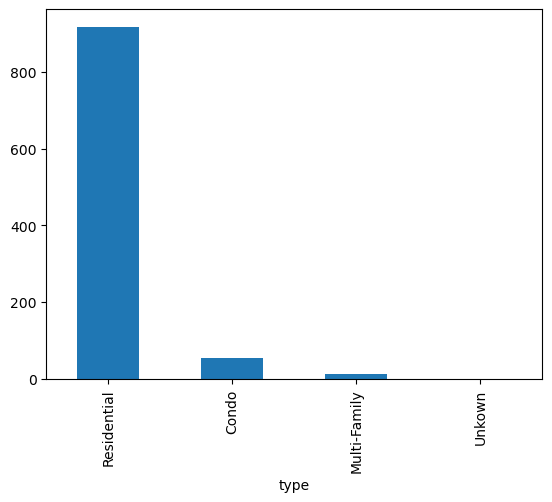

In [40]:
data['type'].value_counts().plot(kind='bar')

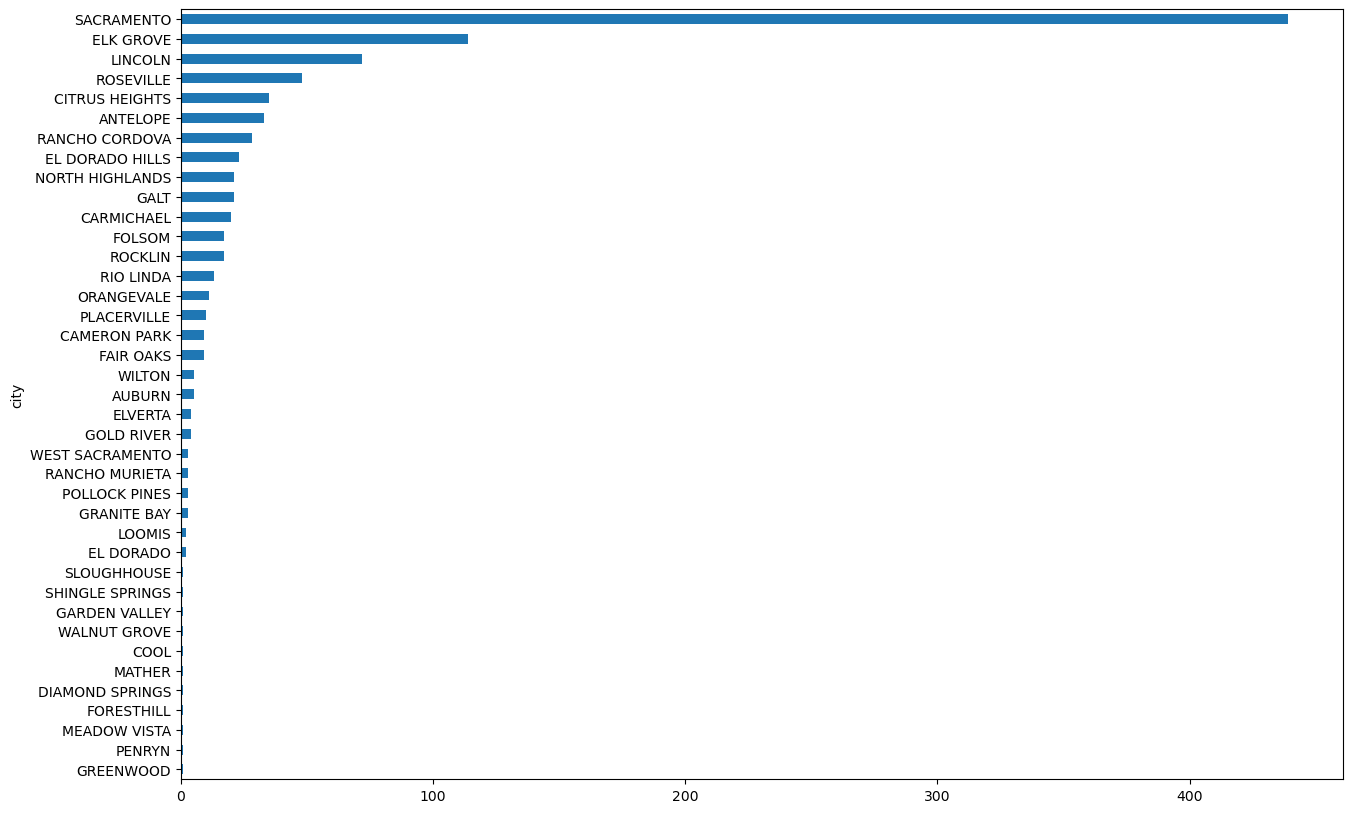

In [41]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [42]:
data.loc[data['beds'] == 0, 'type'] = 'Plot'

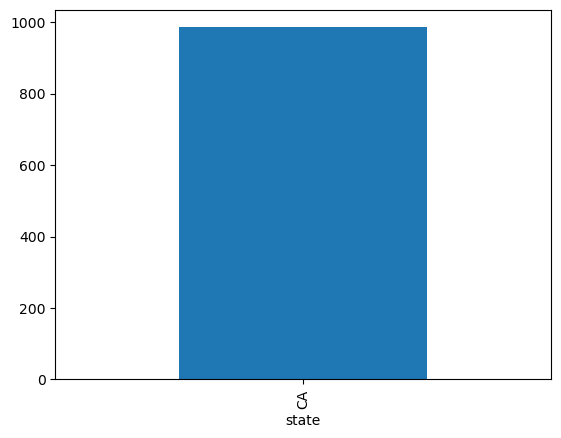

In [43]:
data['state'].value_counts().plot(kind='bar');

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [25]:
# ANSWER
# Price is a dependent variable that depends on other variables. 

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER
#type, baths, beds

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [44]:
Y = data['price']

In [45]:
X = data['beds']

In [52]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();

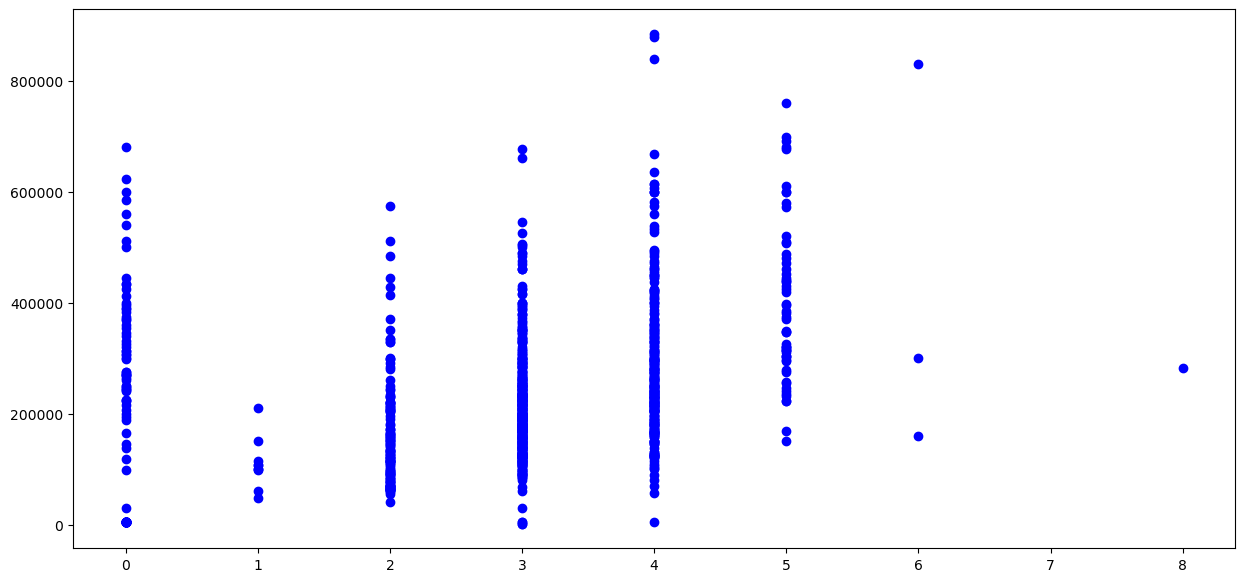

In [53]:
draw_scatter_plot(data['beds'], data['price'])

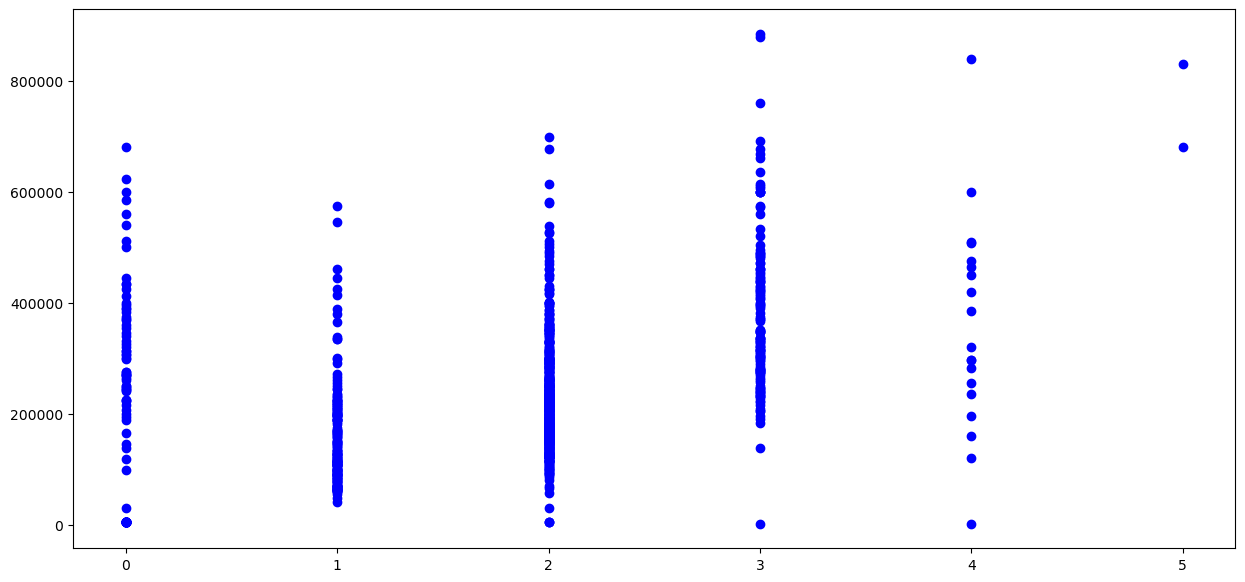

In [54]:
draw_scatter_plot(data['baths'], data['price'])

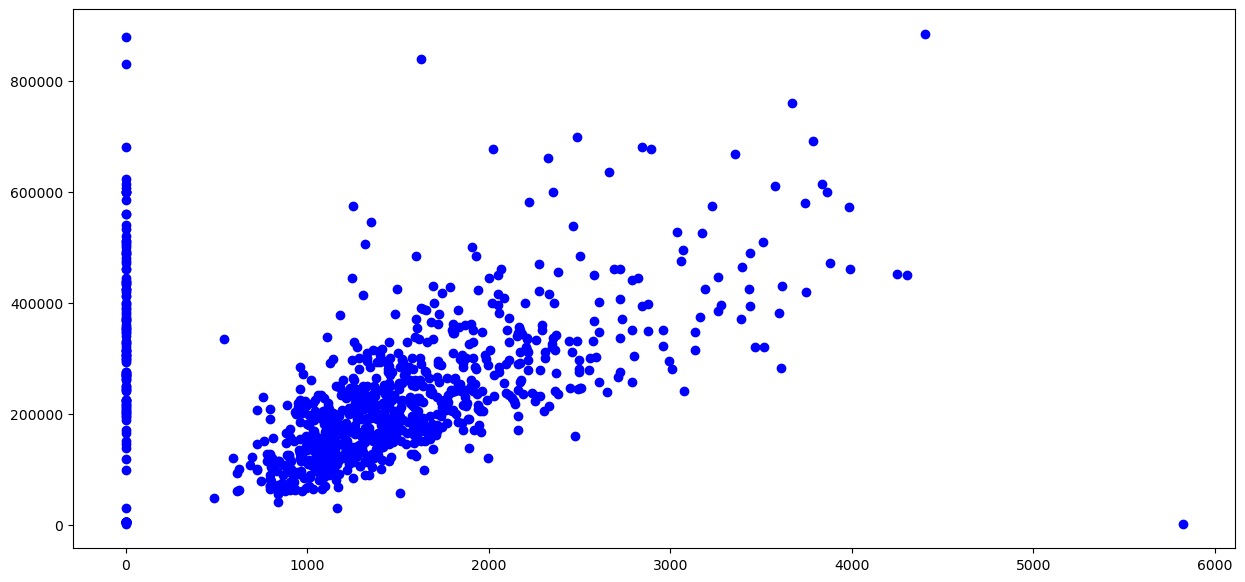

In [55]:
draw_scatter_plot(data['sq__ft'], data['price'])

In [ ]:
# ANSWER
# there is a positive, linear correlation between sq_ft and price


In [57]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [61]:
# ANSWER
# finding the mean
data['y_hat'] = data['price'].mean()

In [62]:
X = data['sq__ft']
Y = data['price']
Yhat = data['y_hat']

In [63]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

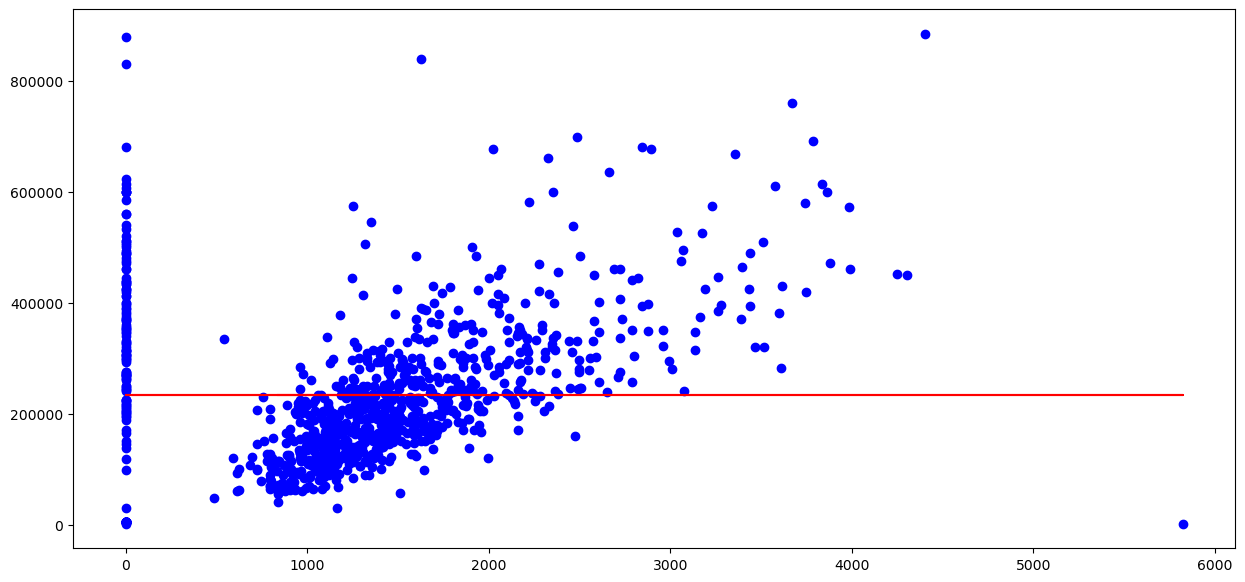

In [64]:
draw_plot(X, Y, Yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [65]:
# ANSWER
res = abs(data['price'] - data['y_hat']).mean()
res


103452.16956891441

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [66]:
# ANSWER
X = data['sq__ft']
Y = data['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [ ]:
# ANSWER

In [67]:
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    n = np.sum((Y - Ybar) * (X - Xbar))
    d = np.sum(np.square(X - Xbar))

    beta_1 = n/d

    return beta_1

In [68]:
beta_1 = calculate_beta_1(X, Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [ ]:
# ANSWER

In [69]:
def calculate_beta_0(X, Y):

    Xbar = X.mean()
    Ybar = Y.mean()

    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar

    return beta_0

In [70]:
beta_0 = calculate_beta_0(X, Y)
beta_0

162930.16140699777

In [71]:
X

0       836
1      1167
2       796
3       852
4       797
       ... 
980    2280
981    1477
982    1216
983    1685
984    1362
Name: sq__ft, Length: 985, dtype: int64

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [ ]:
# ANSWER

In [72]:
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [73]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [ ]:
# ANSWER

In [74]:
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [75]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [ ]:
# ANSWER

In [76]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [77]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [78]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [79]:
calucate_total_sum_of_square

NameError: name 'calucate_total_sum_of_square' is not defined

In [80]:
calculate_r_square(Y, np.mean(Y))

0.0

In [81]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

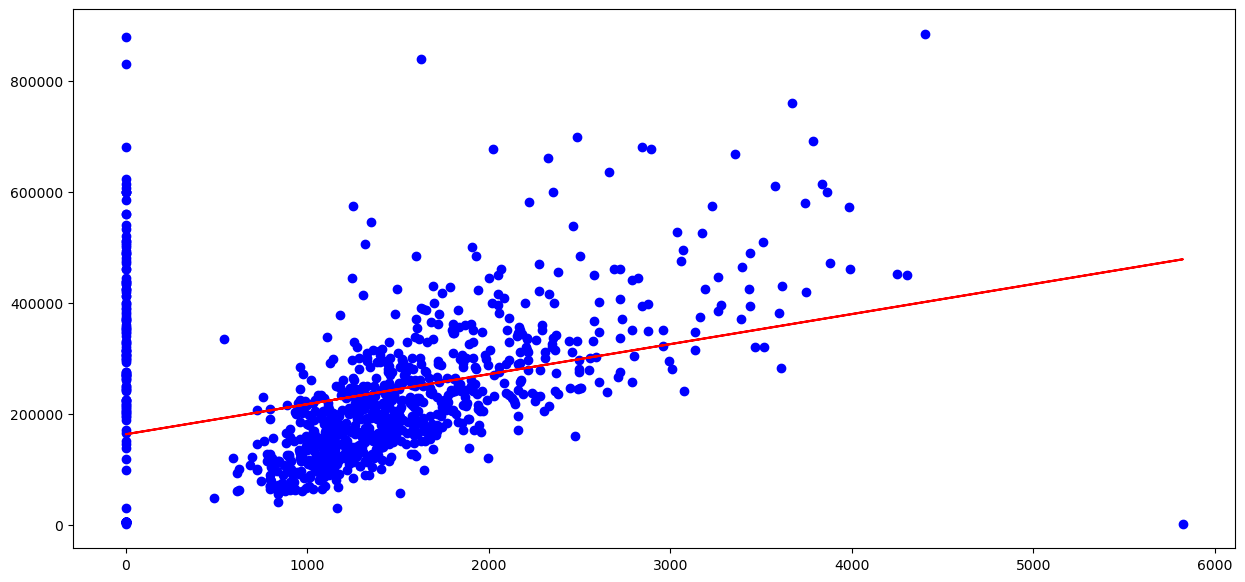

In [82]:
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [ ]:
# ANSWER

In [83]:
data['Yhat'] = Yhat

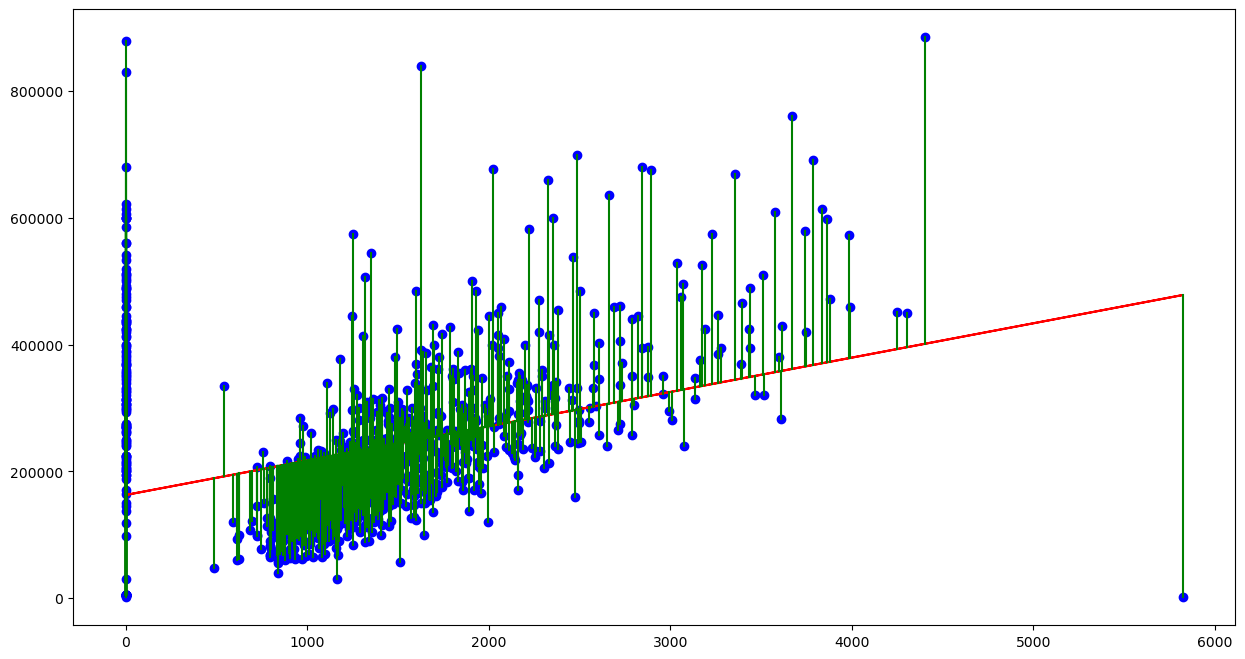

In [84]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER

In [85]:
xpred = 1204
xpred

1204

In [86]:
beta_0

162930.16140699777

In [87]:
beta_1

54.158639688530755

In [88]:
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



